In [16]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import json

In [17]:
output_file = 'output_512/dataset_lru_l2c.csv'

In [18]:
llc_accesses = pd.DataFrame()
llc_misses = pd.DataFrame()

In [19]:
cache_path = 'lru_cache/'
rfoa = pd.read_csv(cache_path + 'llc_rfo_accesses.csv')
rfom = pd.read_csv(cache_path + 'llc_rfo_misses.csv')
loada = pd.read_csv(cache_path + 'llc_load_accesses.csv')
loadm = pd.read_csv(cache_path + 'llc_load_misses.csv')
for i, j in zip(rfoa["id"], loada["id"]):
    if i != j: print(i)
for i, j in zip(rfom["id"], loadm["id"]):
    if i != j: print(i)
for i, j in zip(rfoa["id"], loadm["id"]):
    if i != j: print(i)
llc_accesses["id"] = loadm["id"]
llc_misses["id"] = loadm["id"]
for i in ["1024", "2048", "4096", "8192"]:
    llc_accesses["accesses_" + i] = rfoa[i] + loada[i]
    llc_misses["misses_" + i] = rfom[i] + loadm[i]

In [20]:
cache_path = 'lru_cache/'
rfoa = pd.read_csv(cache_path + 'llcx_rfo_accesses.csv')
rfom = pd.read_csv(cache_path + 'llcx_rfo_misses.csv')
loada = pd.read_csv(cache_path + 'llcx_load_accesses.csv')
loadm = pd.read_csv(cache_path + 'llcx_load_misses.csv')
for i, j in zip(rfoa["id"], loada["id"]):
    if i != j: print(i)
for i, j in zip(rfom["id"], loadm["id"]):
    if i != j: print(i)
for i, j in zip(rfoa["id"], loadm["id"]):
    if i != j: print(i)
# llc_accesses["id"] = loadm["id"]
# llc_misses["id"] = loadm["id"]
for i, j in zip(llc_accesses["id"], loadm["id"]):
    if i != j: print(i)

for i in ['768','1536','3072','6144']:
# for i in ['3072','6144']:
    llc_accesses["accesses_" + i] = rfoa[i] + loada[i]
    llc_misses["misses_" + i] = rfom[i] + loadm[i]

In [23]:
weights = json.load(open('../Downloads/out_weights.json'))

        misses_768  misses_1024  misses_1536  misses_2048  misses_3072  \
0            600.0        594.0        586.0        577.0        574.0   
1            780.0        776.0        770.0        767.0        766.0   
2            490.0        487.0        486.0        485.0        483.0   
3            286.0        286.0        286.0        286.0        285.0   
4            530.0        530.0        528.0        526.0        525.0   
...            ...          ...          ...          ...          ...   
141556       838.0        838.0        838.0        838.0        838.0   
141557       836.0        836.0        836.0        836.0        836.0   
141558       838.0        838.0        838.0        838.0        838.0   
141559       836.0        836.0        836.0        836.0        836.0   
141560       836.0        836.0        836.0        836.0        836.0   

        misses_4096  misses_6144  misses_8192  accesses_768  accesses_1024  \
0             573.0        571.0 

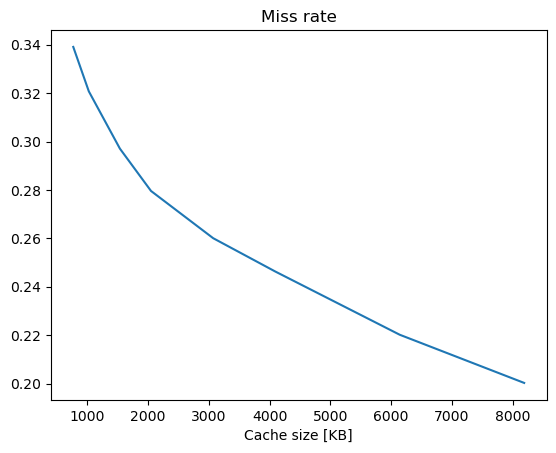

In [40]:
cs = ['768', '1024', '1536', '2048', '3072', '4096', '6144', '8192']
mcs = ['misses_'+i for i in cs]
acs = ['accesses_'+i for i in cs]
mrs = pd.DataFrame()
mrs[mcs] = llc_misses[mcs]
mrs[acs] = llc_accesses[acs]
# print(mrs[mcs].mean())#/ mrs[acs].mean())
mrs2 = mrs.copy()
mrs2['fname'] = ['_'.join(i.split('_')[:-1]) for i in llc_accesses['id']]
print(mrs2)
means = mrs2.groupby('fname').mean()
print(means)
means['asp'] = [x.split('-')[0] for x in means.index]
means['weights'] = [float(weights[x]) for x in means.index]
means['weights'] = means.groupby('asp')['weights'].apply(lambda x: x / x.sum())
for j in cs: 
    means[j] = means['misses_'+j] / means['accesses_'+j]
    means[j] = means[j] * means['weights']
means = means.groupby('asp')[cs].mean()
# print(means)
plt.figure()
plt.plot([768, 1024, 1536, 2048, 3072, 4096, 6144, 8192], means[cs].mean())
plt.title("Miss rate")
plt.xlabel("Cache size [KB]")
plt.show()


In [6]:
# cache_path = 'l2c128/'
# rfoa = pd.read_csv(cache_path + 'llc_rfo_accesses.csv')
# rfom = pd.read_csv(cache_path + 'llc_rfo_misses.csv')
# loada = pd.read_csv(cache_path + 'llc_load_accesses.csv')
# loadm = pd.read_csv(cache_path + 'llc_load_misses.csv')
# for i, j in zip(rfoa["id"], loada["id"]):
#     if i != j: print(i)
# for i, j in zip(rfom["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(rfoa["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(llc_accesses["id"], loadm["id"]):
#     if i != j: print(i)
# for i in ["2048", "4096"]:
#     llc_accesses["accesses_" + i + "_128"] = rfoa[i] + loada[i]
#     llc_misses["misses_" + i + "_128"] = rfom[i] + loadm[i]

In [7]:
# cache_path = 'l2c256/'
# rfoa = pd.read_csv(cache_path + 'llc_rfo_accesses.csv')
# rfom = pd.read_csv(cache_path + 'llc_rfo_misses.csv')
# loada = pd.read_csv(cache_path + 'llc_load_accesses.csv')
# loadm = pd.read_csv(cache_path + 'llc_load_misses.csv')
# for i, j in zip(rfoa["id"], loada["id"]):
#     if i != j: print(i)
# for i, j in zip(rfom["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(rfoa["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(llc_accesses["id"], loadm["id"]):
#     if i != j: print(i)
# for i in ["2048", "4096"]:
#     llc_accesses["accesses_" + i + "_256"] = rfoa[i] + loada[i]
#     llc_misses["misses_" + i + "_256"] = rfom[i] + loadm[i]

In [8]:
# cache_path = 'l2c512/'
# rfoa = pd.read_csv(cache_path + 'llc_rfo_accesses.csv')
# rfom = pd.read_csv(cache_path + 'llc_rfo_misses.csv')
# loada = pd.read_csv(cache_path + 'llc_load_accesses.csv')
# loadm = pd.read_csv(cache_path + 'llc_load_misses.csv')
# for i, j in zip(rfoa["id"], loada["id"]):
#     if i != j: print(i)
# for i, j in zip(rfom["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(rfoa["id"], loadm["id"]):
#     if i != j: print(i)
# for i, j in zip(llc_accesses["id"], loadm["id"]):
#     if i != j: print(i)
# for i in ["2048", "4096"]:
#     llc_accesses["accesses_" + i + "_512"] = rfoa[i] + loada[i]
#     llc_misses["misses_" + i + "_512"] = rfom[i] + loadm[i]

In [9]:
print(llc_misses)

                         id  misses_1024  misses_2048  misses_4096  \
0       400.perlbench-41B_0        594.0        577.0        573.0   
1       400.perlbench-41B_1        776.0        767.0        763.0   
2       400.perlbench-41B_2        487.0        485.0        482.0   
3       400.perlbench-41B_3        286.0        286.0        284.0   
4       400.perlbench-41B_4        530.0        526.0        524.0   
...                     ...          ...          ...          ...   
141556     657.xz_s-56B_744        838.0        838.0        838.0   
141557     657.xz_s-56B_745        836.0        836.0        836.0   
141558     657.xz_s-56B_746        838.0        838.0        838.0   
141559     657.xz_s-56B_747        836.0        836.0        836.0   
141560     657.xz_s-56B_748        836.0        836.0        836.0   

        misses_8192  misses_768  misses_1536  misses_3072  misses_6144  
0             570.0       600.0        586.0        574.0        571.0  
1            

In [10]:
# Previous implementation, will be removed soon
# min_size = 512 * 1024

# if os.path.exists(output_file):
#     out_df = pd.read_csv(output_file)
# else:
#     out_df = pd.DataFrame()

# for file in os.listdir('reuse_distances'):
#     if len(out_df) > 0 and (file[:-4]+"_0")in set(out_df["id"]):
#         print(file, " (found)")
#         continue
#     rd_df = pd.read_csv('reuse_distances/'+file)
#     ctr1 = 0
#     ctr2 = 0
#     ctr4 = 0
#     ctr8 = 0
#     l1d_ctr1 = 0
#     l1d_ctr2 = 0
#     l1d_ctr4 = 0
#     l1d_ctr8 = 0
#     miss_ctr1 = 0
#     miss_ctr2 = 0
#     miss_ctr4 = 0
#     miss_ctr8 = 0
#     prev_ctr = 0
    
#     for i in range(len(rd_df)):
#         my_id = rd_df.iloc[i]
#         row = llc_accesses[llc_accesses["id"] == my_id["id"]]
#         # Accesses 
#         ctr1 += int(row["1024"])
#         ctr2 += int(row["2048"])
#         ctr4 += int(row["4096"])
#         ctr8 += int(row["8192"])
        
#         # Misses
#         row = llc_misses[llc_misses["id"] == my_id["id"]]
#         miss_ctr1 += int(row["1024"])
#         miss_ctr2 += int(row["2048"])
#         miss_ctr4 += int(row["4096"])
#         miss_ctr8 += int(row["8192"])
#         if (ctr1 > min_size) or (i == len(rd_df) - 1 and prev_ctr == 0):
#             out_line = rd_df.iloc[prev_ctr: i+1].sum(axis=0)
#             out_line["id"] = file[:-4] + '_' + str(prev_ctr)
#             out_line = pd.DataFrame(out_line).transpose()
#             out_line["accesses_1024"] = ctr1
#             out_line["misses_1024"] = miss_ctr1
#             out_line["accesses_2048"] = ctr2
#             out_line["misses_2048"] = miss_ctr2
#             out_line["accesses_4096"] = ctr4
#             out_line["misses_4096"] = miss_ctr4
#             out_line["accesses_8192"] = ctr8
#             out_line["misses_8192"] = miss_ctr8
#             out_df = pd.concat([out_df, out_line], ignore_index = True)
#             prev_ctr = i+1
#             ctr1 = 0
#             ctr2 = 0
#             ctr4 = 0
#             ctr8 = 0
#             l1d_ctr1 = 0
#             l1d_ctr2 = 0
#             l1d_ctr4 = 0
#             l1d_ctr8 = 0
#             miss_ctr1 = 0
#             miss_ctr2 = 0
#             miss_ctr4 = 0
#             miss_ctr8 = 0
#     print(f"{file} : {out_df.shape}")
#     out_df.to_csv(output_file,index=False)

Sum the rest according to new lines

In [11]:
# cache_path = 'l2c128/'
output_file = 'output_512/dataset_lru_extra.csv'

In [14]:
min_size = 512 * 1024
# if os.path.exists(output_file):
#     out_df = pd.read_csv(output_file)
# else:
#     out_df = pd.DataFrame()
out_df = pd.DataFrame()

for file in os.listdir('reuse_distances'):
#     if len(out_df) > 0 and (file[:-4]+"_0")in set(out_df["id"]):
#         print(file, " (found)")
#         continue
    rd_df = pd.read_csv('reuse_distances/'+file)
    a = llc_misses.index[llc_misses['id'] == rd_df["id"].iloc[0]].to_list()[0]
    ff = llc_misses.iloc[a: a + 749].rename(columns={"id":"id2"}).reset_index().drop(columns=["index"])
    ff = pd.concat([ff, rd_df], axis=1)
    a = llc_accesses.index[llc_accesses['id'] == rd_df["id"].iloc[0]].to_list()[0]
    dd = llc_accesses.iloc[a: a + 749].rename(columns={"id":"id3"}).reset_index().drop(columns=["index"])
    ff = pd.concat([ff, dd], axis=1)
    for i, j in zip(ff["id"], ff["id2"]):
        if i != j:
            print(f"Error on file {file}: ", i, j)
    for i, j in zip(ff["id"], ff["id3"]):
        if i != j:
            print(i, j)
    ff = ff.drop(columns=["id","id2","id3"])
    prev_ctr = 0
    acc_ctr = 0
    for i in range(len(rd_df)):
        acc_ctr += ff["accesses_1024"].iloc[i]
        if (acc_ctr > min_size) or (i == len(rd_df) - 1 and prev_ctr == 0):
            out_line = ff.iloc[prev_ctr: i+1].sum(axis=0)
            out_line["id"] = file[:-4] + '_' + str(prev_ctr)
            out_line = pd.DataFrame(out_line).transpose()
            out_df = pd.concat([out_df, out_line], ignore_index = True)
            acc_ctr = 0
            prev_ctr = i+1
    print(f"{file} : {out_df.shape}")
out_df.to_csv(output_file,index=False)

400.perlbench-41B.csv : (2, 913)
400.perlbench-50B.csv : (3, 913)
401.bzip2-226B.csv : (17, 913)
401.bzip2-277B.csv : (31, 913)
401.bzip2-38B.csv : (42, 913)
401.bzip2-7B.csv : (55, 913)
403.gcc-16B.csv : (121, 913)
403.gcc-17B.csv : (143, 913)
403.gcc-48B.csv : (145, 913)
410.bwaves-1963B.csv : (195, 913)
410.bwaves-2097B.csv : (245, 913)
410.bwaves-945B.csv : (246, 913)
416.gamess-875B.csv : (247, 913)
429.mcf-184B.csv : (478, 913)
429.mcf-192B.csv : (727, 913)
429.mcf-217B.csv : (835, 913)
429.mcf-22B.csv : (912, 913)
429.mcf-51B.csv : (1094, 913)
433.milc-127B.csv : (1145, 913)
433.milc-274B.csv : (1189, 913)
433.milc-337B.csv : (1249, 913)
434.zeusmp-10B.csv : (1260, 913)
435.gromacs-111B.csv : (1262, 913)
435.gromacs-134B.csv : (1265, 913)
435.gromacs-226B.csv : (1267, 913)
435.gromacs-228B.csv : (1269, 913)
436.cactusADM-1804B.csv : (1283, 913)
437.leslie3d-134B.csv : (1304, 913)
437.leslie3d-149B.csv : (1325, 913)
437.leslie3d-232B.csv : (1346, 913)
437.leslie3d-265B.csv : (136

In [15]:
out_df

,misses_1024,misses_2048,misses_4096,misses_8192,misses_768,misses_1536,misses_3072,misses_6144,0,1,...,4227858432,accesses_1024,accesses_2048,accesses_4096,accesses_8192,accesses_768,accesses_1536,accesses_3072,accesses_6144,id
0,472049.0,421450.0,351091.0,65346.0,488872.0,443527.0,395836.0,167812.0,50816880.0,17323312.0,...,0.0,529724.0,529725.0,529723.0,529725.0,529722.0,529726.0,529724.0,529726.0,400.perlbench-41B_0
1,458759.0,405049.0,349781.0,41091.0,478790.0,426960.0,383021.0,165865.0,17361520.0,6023600.0,...,0.0,529228.0,529231.0,529234.0,529231.0,529228.0,529227.0,529233.0,529233.0,400.perlbench-41B_436
2,451901.0,387321.0,341654.0,139898.0,474718.0,415463.0,363813.0,224886.0,58283520.0,17249296.0,...,0.0,532555.0,532551.0,532550.0,532551.0,532554.0,532560.0,532550.0,532551.0,400.perlbench-50B_0
3,326738.0,118061.0,21285.0,977.0,408753.0,206253.0,49378.0,5516.0,3098304.0,3037808.0,...,0.0,524577.0,524574.0,524640.0,524647.0,524604.0,524591.0,524588.0,524646.0,401.bzip2-226B_0
4,327151.0,111352.0,18058.0,1028.0,409659.0,208962.0,41547.0,4101.0,1623056.0,1618144.0,...,0.0,556219.0,556206.0,556253.0,556263.0,556219.0,556216.0,556252.0,556262.0,401.bzip2-226B_54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,413828.0,316534.0,230046.0,156692.0,451132.0,358589.0,266964.0,184004.0,4869744.0,5968224.0,...,0.0,526753.0,526752.0,526754.0,526753.0,526753.0,526752.0,526752.0,526753.0,657.xz_s-3167B_466
6179,388848.0,288812.0,217246.0,158597.0,430955.0,330998.0,244533.0,184368.0,4967104.0,7056944.0,...,0.0,525645.0,525644.0,525644.0,525646.0,525646.0,525642.0,525645.0,525645.0,657.xz_s-3167B_574
6180,491588.0,464311.0,426390.0,332796.0,502869.0,475940.0,445638.0,376932.0,18063488.0,19199008.0,...,0.0,525774.0,525775.0,525773.0,525766.0,525774.0,525774.0,525774.0,525769.0,657.xz_s-4994B_0
6181,500831.0,477113.0,434054.0,294350.0,510009.0,487733.0,458268.0,363131.0,13498912.0,14343616.0,...,0.0,527383.0,527381.0,527382.0,527374.0,527378.0,527382.0,527378.0,527378.0,657.xz_s-4994B_343


In [ ]:
for i,j in zip(df2["accesses_1024"], out_df["accesses_1024_1024"]):
    if i != j: print(i,j)

In [ ]:
files = ['482.sphinx3-1297B', '482.sphinx3-1522B', '482.sphinx3-1100B', '482.sphinx3-1395B', '482.sphinx3-234B', '482.sphinx3-417B', '600.perlbench_s-570B', '600.perlbench_s-1273B', '600.perlbench_s-210B', '470.lbm-1274B', '621.wrf_s-6673B', '621.wrf_s-8065B', '621.wrf_s-575B', '621.wrf_s-8100B', '400.perlbench-50B', '400.perlbench-41B', '403.gcc-48B', '403.gcc-16B', '403.gcc-17B', '436.cactusADM-1804B', '464.h264ref-57B', '464.h264ref-64B', '464.h264ref-30B', '464.h264ref-97B', '459.GemsFDTD-765B', '459.GemsFDTD-1418B', '459.GemsFDTD-1211B', '459.GemsFDTD-1320B', '459.GemsFDTD-1169B', '459.GemsFDTD-1491B', 
         '435.gromacs-111B', '435.gromacs-134B', '435.gromacs-228B', '435.gromacs-226B', 
         '625.x264_s-18B', '625.x264_s-33B', '625.x264_s-39B', '625.x264_s-12B', '625.x264_s-20B', '458.sjeng-767B', '458.sjeng-1088B', '458.sjeng-283B', '458.sjeng-31B', '473.astar-153B', '473.astar-42B', '473.astar-359B', '453.povray-576B', '453.povray-887B', '453.povray-252B', '453.povray-800B', '627.cam4_s-490B', '627.cam4_s-573B', '450.soplex-92B', '450.soplex-247B', '434.zeusmp-10B', 
         '429.mcf-51B', '429.mcf-217B', '429.mcf-192B', '429.mcf-22B', '429.mcf-184B']

In [ ]:
print(len(['482.sphinx3-1297B', '482.sphinx3-1522B', '482.sphinx3-1100B', '482.sphinx3-1395B', '482.sphinx3-234B', '482.sphinx3-417B', '600.perlbench_s-570B', '600.perlbench_s-1273B', '600.perlbench_s-210B', '470.lbm-1274B', '621.wrf_s-6673B', '621.wrf_s-8065B', '621.wrf_s-575B', '621.wrf_s-8100B', '400.perlbench-50B', '400.perlbench-41B', '403.gcc-48B', '403.gcc-16B', '403.gcc-17B', '436.cactusADM-1804B', '464.h264ref-57B', '464.h264ref-64B', '464.h264ref-30B', '464.h264ref-97B', '459.GemsFDTD-765B', '459.GemsFDTD-1418B', '459.GemsFDTD-1211B', '459.GemsFDTD-1320B', '459.GemsFDTD-1169B', '459.GemsFDTD-1491B', '435.gromacs-111B', '435.gromacs-134B', '435.gromacs-228B', '435.gromacs-226B', '625.x264_s-18B', '625.x264_s-33B', '625.x264_s-39B', '625.x264_s-12B', '625.x264_s-20B', '458.sjeng-767B', '458.sjeng-1088B', '458.sjeng-283B', '458.sjeng-31B', '473.astar-153B', '473.astar-42B', '473.astar-359B', '453.povray-576B', '453.povray-887B', '453.povray-252B', '453.povray-800B', '627.cam4_s-490B', '627.cam4_s-573B', '450.soplex-92B', '450.soplex-247B', '434.zeusmp-10B', '429.mcf-51B', '429.mcf-217B', '429.mcf-192B', '429.mcf-22B', '429.mcf-184B']))